In [ ]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
from collections import Counter

In [ ]:
data = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
data.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

### EDA

**where are most developers in stackoverflow comes from?**

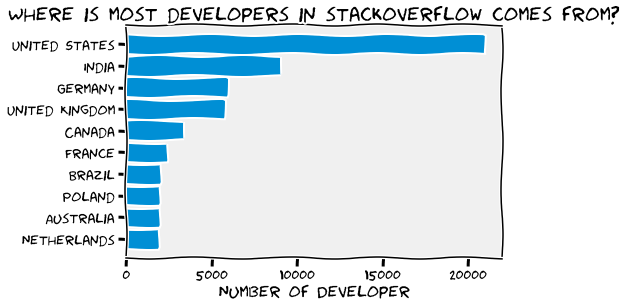

In [ ]:
country_count = data['Country'].value_counts().head(10).iloc[::-1]
countries = country_count.index
counts = country_count.values

plt.style.use('fivethirtyeight')
plt.xkcd()
plt.barh(countries,counts)
plt.xlabel('Number of Developer')
plt.title('Where is most developers in stackoverflow comes from?')
plt.show()

In [ ]:
condition_de = (data['Country'] == 'Germany')
condition_us = (data['Country'] == 'United States')
condition_id = (data['Country'] == 'Indonesia')
de_data = data.loc[condition_de, ['UndergradMajor','EdLevel','YearsCode','Age','JobSat','WorkRemote','WorkPlan','WorkWeekHrs']]
us_data = data.loc[condition_us, ['UndergradMajor','EdLevel','YearsCode','Age','JobSat','WorkRemote','WorkPlan','WorkWeekHrs']]
id_data = data.loc[condition_id, ['UndergradMajor','EdLevel','YearsCode','Age','JobSat','WorkRemote','WorkPlan','WorkWeekHrs']]
print(f'based on the survey, number of developers in US {len(us_data)}, in Germany {len(de_data)} and in Indonesia {len(id_data)}')

based on the survey, number of developers in US 20949, in Germany 5866 and in Indonesia 507


**which major did developers in stackoverflow took?**

In [ ]:
def change_major_name(x):
  if x == 'Computer science, computer engineering, or software engineering':
    return 'Computer Science'
  elif x == 'Another engineering discipline (ex. civil, electrical, mechanical)':
    return 'Engineering'
  elif x == 'Information systems, information technology, or system administration':
    return 'IT'
  elif x == 'Web development or web design':
    return 'Web'
  elif x == 'A natural science (ex. biology, chemistry, physics)':
    return 'Natural Science'
  elif x == 'Mathematics or statistics':
    return 'Math'
  elif x == 'A business discipline (ex. accounting, finance, marketing)':
    return 'Business'
  elif x == 'A humanities discipline (ex. literature, history, philosophy)':
    return 'Humanities'
  elif x == 'A social science (ex. anthropology, psychology, political science)':
    return 'Social Science'
  elif x == 'Fine arts or performing arts (ex. graphic design, music, studio art)':
    return 'Art'
  elif x == 'I never declared a major':
    return 'No Major'
  else:
    return 'Health Science'

In [ ]:
def visualize_major(country_data, country_name):
  majors = country_data.dropna()
  major_list = majors.tolist() 
  majors_cg_name = [change_major_name(x) for x in major_list]
  major_counter = Counter(majors_cg_name)
  ordered_major = major_counter.most_common(12)
  major = [x[0] for x in ordered_major][::-1]
  count = [x[1] for x in ordered_major][::-1]

  plt.figure(figsize=(8,6))
  plt.style.use('fivethirtyeight')
  plt.xkcd()
  plt.barh(major,count)
  plt.xlabel('Number of Developer')
  plt.title(f'Which major did developers in {country_name} took?')
  plt.show()

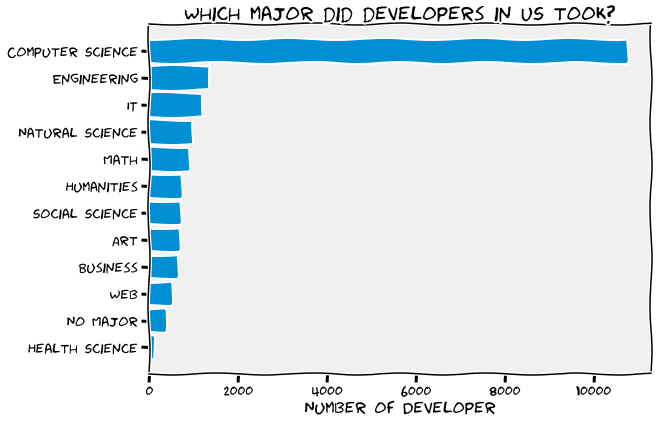

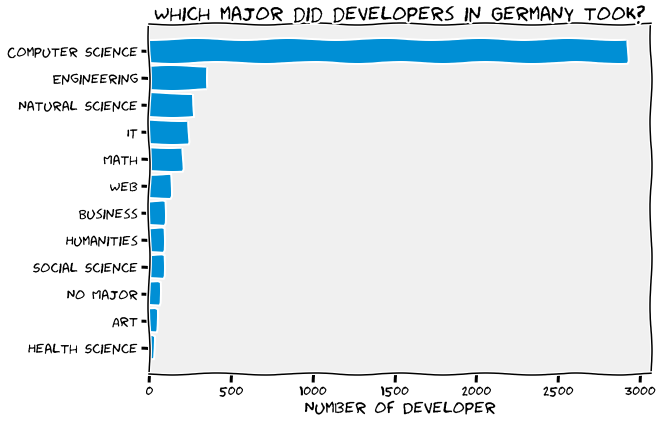

In [ ]:
visualize_major(us_data['UndergradMajor'], 'US')
visualize_major(de_data['UndergradMajor'], 'Germany')

**which education level did developer in stackoverflow took?** 





In [ ]:
def change_ed_name(x):
  if x == 'Bachelor’s degree (BA, BS, B.Eng., etc.)':
    return 'Bachelor degree'
  elif x == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)':
    return 'Master degree'
  elif x == 'Some college/university study without earning a degree':
    return 'College without degree'
  elif x == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
    return 'Secondary school'
  elif x == 'Other doctoral degree (Ph.D, Ed.D., etc.)':
    return 'Doctoral degree'
  elif x == 'Professional degree (JD, MD, etc.)':
    return 'Professional degree'
  elif x == 'I never completed any formal education':
    return 'No Formal Education'
  elif x == 'Associate degree':
    return 'Associate degree'
  else:
    return 'Primary/elementary school'

In [ ]:
def visualize_education_level(country_data, country_name):
  educations = country_data.dropna()
  education_list = educations.tolist()
  ed_cg_name = [change_ed_name(x) for x in education_list]
  ed_counter = Counter(ed_cg_name)
  ordered_ed = ed_counter.most_common(9)
  education = [x[0] for x in ordered_ed][::-1]
  count = [x[1] for x in ordered_ed][::-1]

  plt.figure(figsize=(8,6))
  plt.style.use('fivethirtyeight')
  plt.xkcd()
  plt.barh(education,count)
  plt.xlabel('Number of Developer')
  plt.title(f'Which education level did developers in {country_name} took?')
  plt.show()

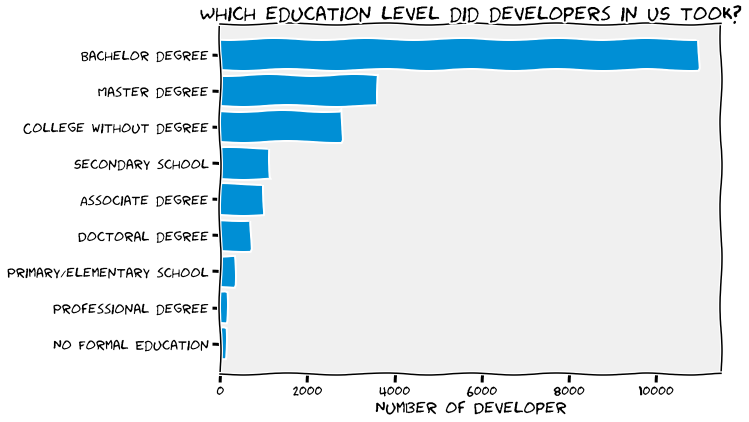

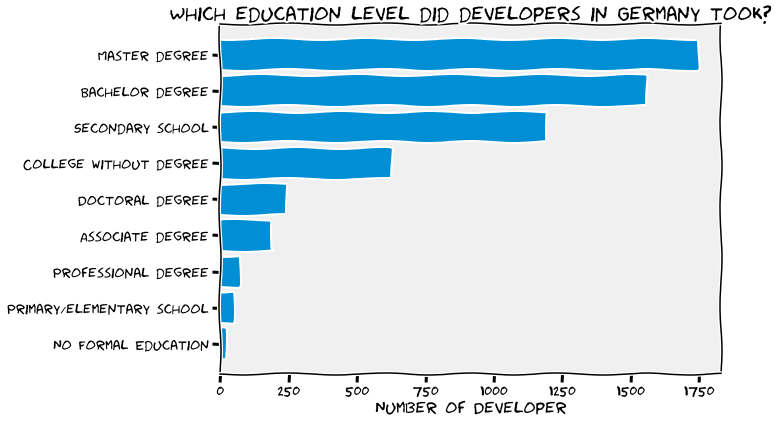

In [ ]:
visualize_education_level(us_data['EdLevel'],'US')
visualize_education_level(de_data['EdLevel'],'Germany')

**how long have the developers been coding?**

In [ ]:
def generate_years(years_data):
  years = years_data.tolist()
  unwanted_years = ['Less than 1 year','More than 50 years',np.nan]
  years  = [x for x in years if x not in unwanted_years]
  years_int = [int(x) for x in years]
  return years_int

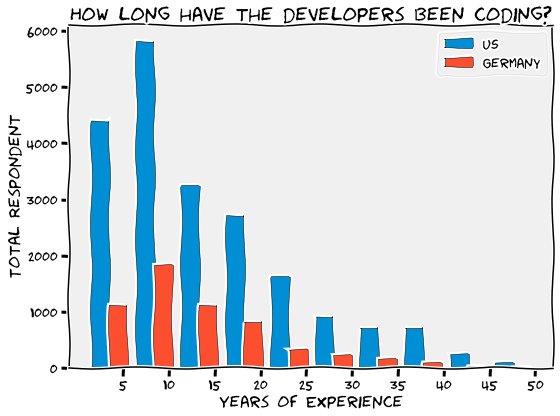

In [ ]:
us_years = generate_years(us_data['YearsCode'])
de_years = generate_years(de_data['YearsCode'])

plt.figure(figsize=(8,6))
bins = [5,10,15,20,25,30,35,40,45,50]
plt.style.use('fivethirtyeight')  # style 
plt.xkcd()  # efek kartun
plt.hist([us_years,de_years], bins=10, edgecolor='black', label=['US','Germany'])
plt.title('How long have the developers been coding?')
plt.xticks(ticks=bins)
plt.xlabel('Years of Experience')
plt.ylabel('Total Respondent')
plt.legend()
plt.tight_layout() # better padding 
plt.show()

**age of developers** 

In [ ]:
def generate_age(age_data):
  age_list = age_data.tolist()
  clean_age = [x for x in age_list if x is not np.nan]
  return clean_age

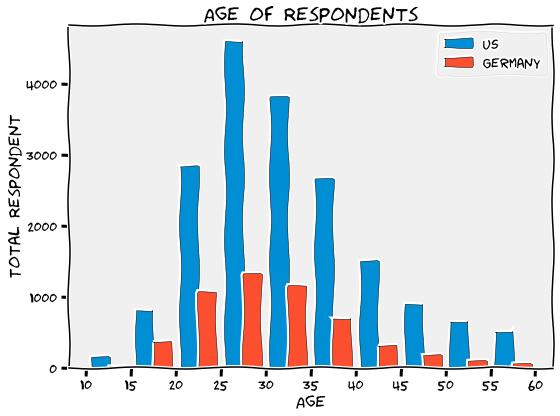

In [ ]:
us_age = generate_age(us_data['Age'])
de_age = generate_age(de_data['Age'])

plt.figure(figsize=(8,6))
bins = [10,20,30,40,50,60]
y_label = [10,15,20,25,30,35,40,45,50,55,60]
plt.style.use('fivethirtyeight')  
plt.xkcd()  
plt.hist([us_age,de_age], bins=y_label, edgecolor='black', label=['US','Germany'])


plt.title('Age of Respondents')
plt.xlabel('Age')
plt.ylabel('Total Respondent')
plt.xticks(ticks=y_label)
#plt.yscale('log')
plt.legend()
plt.tight_layout() 
plt.show()

**how satisfied are the developers with their job?**

In [ ]:
def visualize_work_satisfaction(country_data, country_name):
  datas = country_data.tolist()
  slightly_satisfied = [x for x in datas if x == 'Slightly satisfied']
  slightly_dissatisfied = [x for x in datas if x == 'Slightly dissatisfied']
  neither = [x for x in datas if x == 'Neither satisfied nor dissatisfied']
  very_satisfied = [x for x in datas if x == 'Very satisfied']
  very_dissatisfied = [x for x in datas if x == 'Very dissatisfied']

  slightly_satisfied_num = len(slightly_satisfied)
  slightly_dissatisfied_num = len(slightly_dissatisfied)
  neither_num = len(neither)
  very_satisfied_num = len(very_satisfied)
  very_dissatisfied_num = len(very_dissatisfied)

  slices = [slightly_satisfied_num,slightly_dissatisfied_num,neither_num,very_satisfied_num,very_dissatisfied_num]
  labels = ['Slightly satisfied','Slightly dissatisfied','Neither','Very satisfied','Very dissatisfied']

  plt.figure(figsize=(8,6))
  plt.style.use('fivethirtyeight')  
  plt.xkcd() 
  plt.pie(slices, labels=labels,shadow=True, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
  plt.title(f'Level of Work Satisfaction of Developer in {country_name}')
  plt.tight_layout() 
  plt.show()

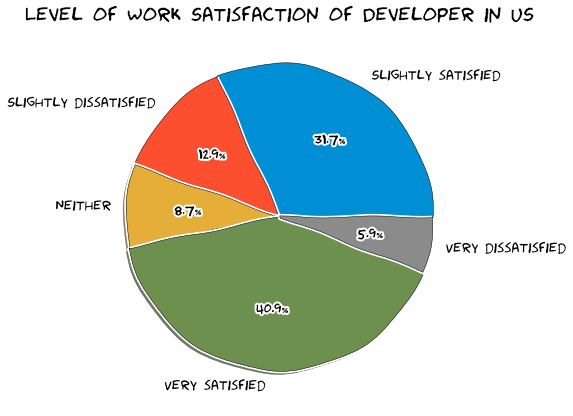

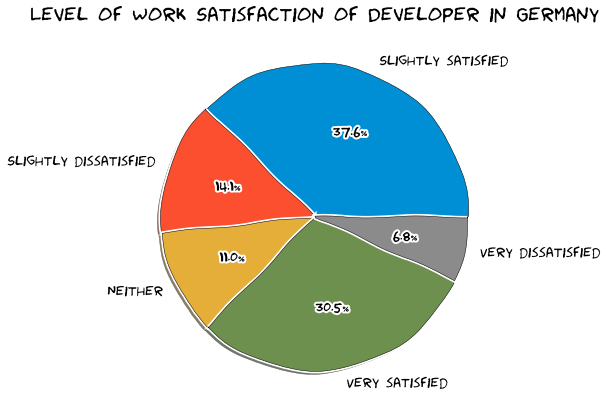

In [ ]:
visualize_work_satisfaction(us_data['JobSat'],'US')
visualize_work_satisfaction(de_data['JobSat'],'Germany')

**percentage of remote working**

In [ ]:
def visualize_remote_pecentage(country_data, country_name):
  work_remote = country_data.tolist()
  never = [x for x in work_remote if x == 'Less than once per month / Never']
  fulltime = [x for x in work_remote if x == 'All or almost all the time (I\'m full-time remote)']
  halftime = [x for x in work_remote if x == 'About half the time']
  more_than_halftime = [x for x in work_remote if x == 'More than half, but not all, the time']
  less_than_halftime = [x for x in work_remote if x == 'Less than half the time, but at least one day each week']

  never_num = len(never)
  fulltime_num = len(fulltime)
  halftime_num = len(halftime)
  more_than_halftime_num = len(more_than_halftime)
  less_than_halftime_num = len(less_than_halftime)   

  slices = [never_num,fulltime_num,halftime_num,more_than_halftime_num,less_than_halftime_num]
  labels = ['Never','Full Time','Half Time','More Than Half Time','Less Than Half Time']
  explode = [0,0,0.1,0.1,0]

  plt.figure(figsize=(8,6))
  plt.style.use('fivethirtyeight')  
  plt.xkcd() 
  plt.pie(slices, labels=labels, explode=explode ,shadow=True, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black'}, startangle=90)
  plt.title(f'Percentage of Remote Working in {country_name}')
  plt.tight_layout() 
  plt.show()                       

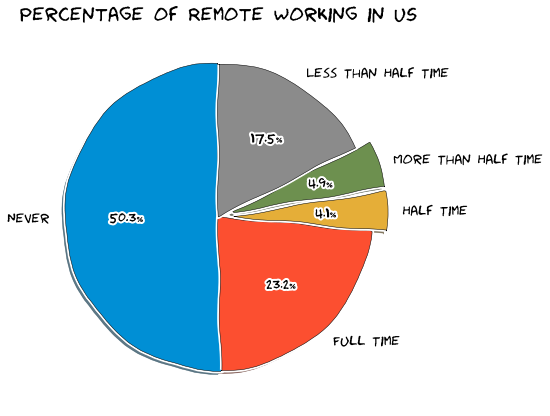

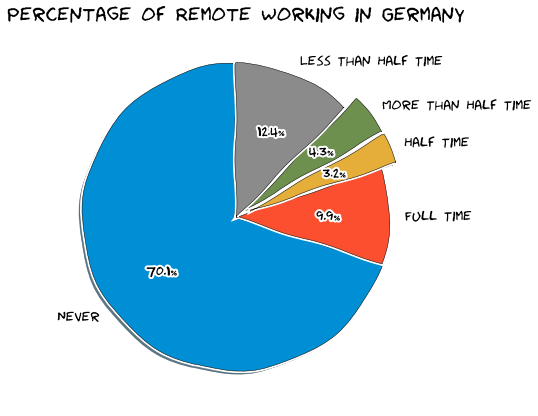

In [ ]:
visualize_remote_pecentage(us_data['WorkRemote'],'US')
visualize_remote_pecentage(de_data['WorkRemote'],'Germany')

**does developer have schedule or not?**

In [ ]:
def change_name(x):
  if x == "There's no schedule or spec; I work on what seems most important or urgent":
    return 'Without Schedule'
  else:
    return 'With Schedule'

In [ ]:
def calculate_work_plan(country_data):
  data_no_nan = country_data.dropna()
  datas = data_no_nan.apply(change_name)
  data_list = datas.tolist()
  with_schedule = len([x for x in data_list if x == 'With Schedule'])
  without_schedule = len([x for x in data_list if x == 'Without Schedule'])
  return with_schedule, without_schedule

In [ ]:
us_work_plan = calculate_work_plan(us_data['WorkPlan'])
de_work_plan = calculate_work_plan(de_data['WorkPlan'])

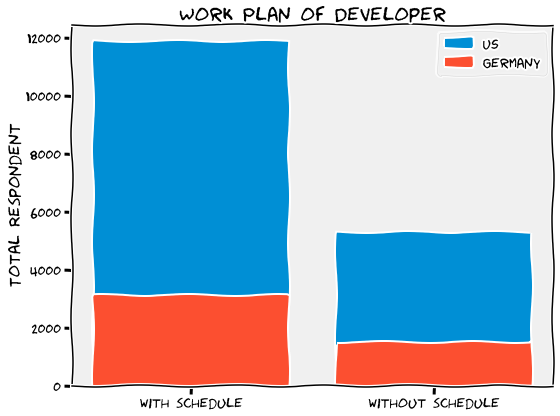

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')  
plt.xkcd()  
plt.bar(['with schedule','without schedule'], [us_work_plan[0],us_work_plan[1]],label='US')
plt.bar(['with schedule','without schedule'], [de_work_plan[0],de_work_plan[1]],label='Germany')
plt.title('Work Plan of Developer')
plt.ylabel('Total Respondent')
plt.legend()
plt.tight_layout() 
plt.show()

**how long does developer work per week?**

In [ ]:
def generate_hours(country_data):
  hr_no_nan = country_data.dropna()
  hr_float = hr_no_nan.tolist()
  hr_int = [int(x) for x in hr_float]
  filtered_hr = [x for x in hr_int if x in range(70)]
  return filtered_hr

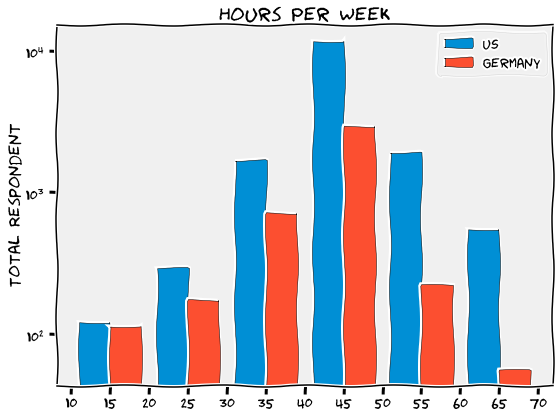

In [ ]:
us_workhrs = generate_hours(us_data['WorkWeekHrs'])
de_workhrs = generate_hours(de_data['WorkWeekHrs'])

plt.figure(figsize=(8,6))
bins = [10,20,30,40,50,60,70]
x_label = [10,15,20,25,30,35,40,45,50,55,60,65,70]
plt.style.use('fivethirtyeight')  
plt.xkcd()  
plt.hist([us_workhrs,de_workhrs],bins=bins,edgecolor='black',label=['US','Germany'])

plt.title('Hours Per Week')
plt.ylabel('Total Respondent')
plt.xticks(ticks=x_label)
plt.yscale('log')
plt.tight_layout() 
plt.legend()
plt.show()

### data cleaning

In [ ]:
# only for US data & developer & full time employee 
condition = ((data['Country'] == 'United States') & 
            (data['MainBranch'] == 'I am a developer by profession') &
            (data['Employment'] == 'Employed full-time'))
filt_data = data.loc[condition,['EdLevel','UndergradMajor','DevType','YearsCode','Age1stCode','YearsCodePro','ImpSyn','Age','ConvertedComp']]
filt_data.shape

(14420, 9)

In [ ]:
# drop null value 
filt_data.isnull().sum()
filt_data.dropna(inplace=True)
filt_data.isnull().sum()

EdLevel           0
UndergradMajor    0
DevType           0
YearsCode         0
Age1stCode        0
YearsCodePro      0
ImpSyn            0
Age               0
ConvertedComp     0
dtype: int64

In [ ]:
filt_data.shape

(11277, 9)

**fix dev type feature**

In [ ]:
filt_data['DevType'] = filt_data['DevType'].apply(lambda x: x.replace(";",",").split(",")[0])
filt_data

,EdLevel,UndergradMajor,DevType,YearsCode,Age1stCode,YearsCodePro,ImpSyn,Age,ConvertedComp
3,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Developer,3,16,Less than 1 year,A little below average,22.0,61000.0
12,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Data or business analyst,17,11,8,A little above average,28.0,90000.0
22,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Developer,3,19,1,Average,22.0,69000.0
25,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Designer,12,8,8,Far above average,34.0,114000.0
31,Associate degree,"Information systems, information technology, o...",Developer,3,16,2,A little above average,21.0,1100000.0
...,...,...,...,...,...,...,...,...,...
88312,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",Developer,15,16,11,Average,36.0,120000.0
88321,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist,7,19,4,A little above average,26.0,2000000.0
88323,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Developer,8,15,2,Average,23.0,180000.0
88324,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Data scientist or machine learning specialist,31,18,28,Far above average,48.0,2000000.0


In [ ]:
filt_data['DevType'].unique()

array(['Developer', 'Data or business analyst', 'Designer',
       'Database administrator', 'Engineering manager', 'Engineer',
       'Academic researcher',
       'Data scientist or machine learning specialist',
       'DevOps specialist', 'Senior executive/VP', 'Scientist',
       'System administrator', 'Student', 'Educator', 'Product manager'],
      dtype=object)

In [ ]:
len(filt_data.loc[filt_data['DevType'] == 'Student'])

1

In [ ]:
filt_data = filt_data.drop(filt_data[filt_data.DevType == 'Student'].index)
filt_data.shape

(11276, 9)

In [ ]:
filt_data['DevType'].unique()

array(['Developer', 'Data or business analyst', 'Designer',
       'Database administrator', 'Engineering manager', 'Engineer',
       'Academic researcher',
       'Data scientist or machine learning specialist',
       'DevOps specialist', 'Senior executive/VP', 'Scientist',
       'System administrator', 'Educator', 'Product manager'],
      dtype=object)

**fix education level feature**

In [ ]:
filt_data['EdLevel'].unique()

array(['Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree', 'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)'], dtype=object)

In [ ]:
def change_education_name(x):
  if x == 'Bachelor’s degree (BA, BS, B.Eng., etc.)':
    return 'Bachelor degree'
  elif x == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)':
    return 'Master degree'
  elif x == 'Associate degree':
    return 'Associate degree'
  elif x == 'Professional degree (JD, MD, etc.)':
    return 'Professional degree'
  elif x == 'Other doctoral degree (Ph.D, Ed.D., etc.)':
    return 'Doctoral degree'
  else:
    return 'No degree'

In [ ]:
filt_data['EdLevel'] = filt_data['EdLevel'].apply(lambda x: change_education_name(x))
filt_data['EdLevel'].unique()

array(['Bachelor degree', 'Master degree', 'No degree',
       'Associate degree', 'Doctoral degree', 'Professional degree'],
      dtype=object)

**fix major feature**

In [ ]:
filt_data['UndergradMajor'].unique()

array(['Computer science, computer engineering, or software engineering',
       'Information systems, information technology, or system administration',
       'A humanities discipline (ex. literature, history, philosophy)',
       'Mathematics or statistics',
       'Another engineering discipline (ex. civil, electrical, mechanical)',
       'A social science (ex. anthropology, psychology, political science)',
       'Web development or web design', 'I never declared a major',
       'A natural science (ex. biology, chemistry, physics)',
       'Fine arts or performing arts (ex. graphic design, music, studio art)',
       'A business discipline (ex. accounting, finance, marketing)',
       'A health science (ex. nursing, pharmacy, radiology)'],
      dtype=object)

In [ ]:
filt_data['UndergradMajor'] = filt_data['UndergradMajor'].apply(lambda x: change_major_name(x))
filt_data['UndergradMajor'].unique()

array(['Computer Science', 'IT', 'Humanities', 'Math', 'Engineering',
       'Social Science', 'Web', 'No Major', 'Natural Science', 'Art',
       'Business', 'Health Science'], dtype=object)

**fix ImpSyn feature**

In [ ]:
filt_data['ImpSyn'].unique()

array(['A little below average', 'A little above average', 'Average',
       'Far above average', 'Far below average'], dtype=object)

In [ ]:
def change_imp_name(x):
  if (x == 'A little below average') | (x == 'Far below average'):
    return 'below average'
  elif (x == 'A little above average') | (x == 'Far above average'):
    return 'above average'
  else:
    return 'average'

In [ ]:
filt_data['ImpSyn'] = filt_data['ImpSyn'].apply(lambda x: change_imp_name(x))
filt_data['ImpSyn'].unique()

array(['below average', 'above average', 'average'], dtype=object)

**fix years of code features**

In [ ]:
filt_data['YearsCode'].unique()

array(['3', '17', '12', '14', '30', '35', '28', '15', '11', '8', '20',
       '50', '10', '16', '25', '7', '6', '9', '5', '21', '22', '4', '23',
       '24', '39', '38', '40', '2', '19', '33', '18', '31',
       'Less than 1 year', '26', '13', '37', '27', '32', '45', '29', '36',
       '43', '44', '1', '34', '41', '47', '42', '49', '46', '48',
       'More than 50 years'], dtype=object)

In [ ]:
filt_data['YearsCode'] = filt_data['YearsCode'].replace(['Less than 1 year','More than 50 years'],['1','50'])
filt_data['YearsCode'].unique()

array(['3', '17', '12', '14', '30', '35', '28', '15', '11', '8', '20',
       '50', '10', '16', '25', '7', '6', '9', '5', '21', '22', '4', '23',
       '24', '39', '38', '40', '2', '19', '33', '18', '31', '1', '26',
       '13', '37', '27', '32', '45', '29', '36', '43', '44', '34', '41',
       '47', '42', '49', '46', '48'], dtype=object)

In [ ]:
filt_data['YearsCodePro'].unique()

array(['Less than 1 year', '8', '1', '2', '14', '23', '20', '5', '10',
       '48', '4', '11', '12', '9', '6', '3', '7', '15', '16', '22', '19',
       '30', '33', '17', '21', '35', '37', '13', '18', '28', '26', '27',
       '25', '34', '24', '29', '44', '36', '32', '41', '43', '39', '42',
       '31', '40', '38', '45', '47', 'More than 50 years', '50', '49'],
      dtype=object)

In [ ]:
filt_data['YearsCodePro'] = filt_data['YearsCodePro'].replace(['Less than 1 year','More than 50 years'],['1','50'])
filt_data['YearsCodePro'].unique()

array(['1', '8', '2', '14', '23', '20', '5', '10', '48', '4', '11', '12',
       '9', '6', '3', '7', '15', '16', '22', '19', '30', '33', '17', '21',
       '35', '37', '13', '18', '28', '26', '27', '25', '34', '24', '29',
       '44', '36', '32', '41', '43', '39', '42', '31', '40', '38', '45',
       '47', '50', '49'], dtype=object)

In [ ]:
filt_data['Age1stCode'].unique()

array(['16', '11', '19', '8', '21', '6', '10', '12', '29', '13', '14',
       '17', '18', '15', '25', '9', '26', '20', '27', '30', '7', '23',
       '22', 'Younger than 5 years', '31', '5', '36', '34', '28', '32',
       '24', '37', '33', '35', '40', '39', '50', '45', '38', '43', '41',
       '42', '44'], dtype=object)

In [ ]:
filt_data['Age1stCode'] = filt_data['Age1stCode'].replace('Younger than 5 years','5')
filt_data['Age1stCode'].unique()

array(['16', '11', '19', '8', '21', '6', '10', '12', '29', '13', '14',
       '17', '18', '15', '25', '9', '26', '20', '27', '30', '7', '23',
       '22', '5', '31', '36', '34', '28', '32', '24', '37', '33', '35',
       '40', '39', '50', '45', '38', '43', '41', '42', '44'], dtype=object)

In [ ]:
filt_data['Age'].unique()

array([22. , 28. , 34. , 21. , 35. , 42. , 45. , 47. , 30. , 37. , 33. ,
       64. , 26. , 38. , 32. , 36. , 24. , 25. , 27. , 39. , 44. , 23. ,
       40. , 43. , 52. , 31. , 50. , 51. , 41. , 29. , 67. , 58. , 49. ,
       53. , 48. , 46. , 62. , 57. , 54. , 61. , 56. , 19. , 20. , 60. ,
       59. , 55. , 63. , 26.5,  1. , 69. , 18. , 99. , 65. , 31.5, 17. ,
        2. , 68. , 74. , 66. , 72. , 70. , 37.5, 16. , 71. ])

**fix data types**

In [ ]:
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11276 entries, 3 to 88325
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EdLevel         11276 non-null  object 
 1   UndergradMajor  11276 non-null  object 
 2   DevType         11276 non-null  object 
 3   YearsCode       11276 non-null  object 
 4   Age1stCode      11276 non-null  object 
 5   YearsCodePro    11276 non-null  object 
 6   ImpSyn          11276 non-null  object 
 7   Age             11276 non-null  float64
 8   ConvertedComp   11276 non-null  float64
dtypes: float64(2), object(7)
memory usage: 880.9+ KB


In [ ]:
filt_data['YearsCode'] = filt_data['YearsCode'].astype(int)
filt_data['Age1stCode'] = filt_data['YearsCode'].astype(int)
filt_data['YearsCodePro'] = filt_data['YearsCode'].astype(int)
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11276 entries, 3 to 88325
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EdLevel         11276 non-null  object 
 1   UndergradMajor  11276 non-null  object 
 2   DevType         11276 non-null  object 
 3   YearsCode       11276 non-null  int64  
 4   Age1stCode      11276 non-null  int64  
 5   YearsCodePro    11276 non-null  int64  
 6   ImpSyn          11276 non-null  object 
 7   Age             11276 non-null  float64
 8   ConvertedComp   11276 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 880.9+ KB


### outlier removal

In [ ]:
filt_data.shape

(11276, 9)

In [ ]:
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11276 entries, 3 to 88325
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EdLevel         11276 non-null  object 
 1   UndergradMajor  11276 non-null  object 
 2   DevType         11276 non-null  object 
 3   YearsCode       11276 non-null  int64  
 4   Age1stCode      11276 non-null  int64  
 5   YearsCodePro    11276 non-null  int64  
 6   ImpSyn          11276 non-null  object 
 7   Age             11276 non-null  float64
 8   ConvertedComp   11276 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 880.9+ KB


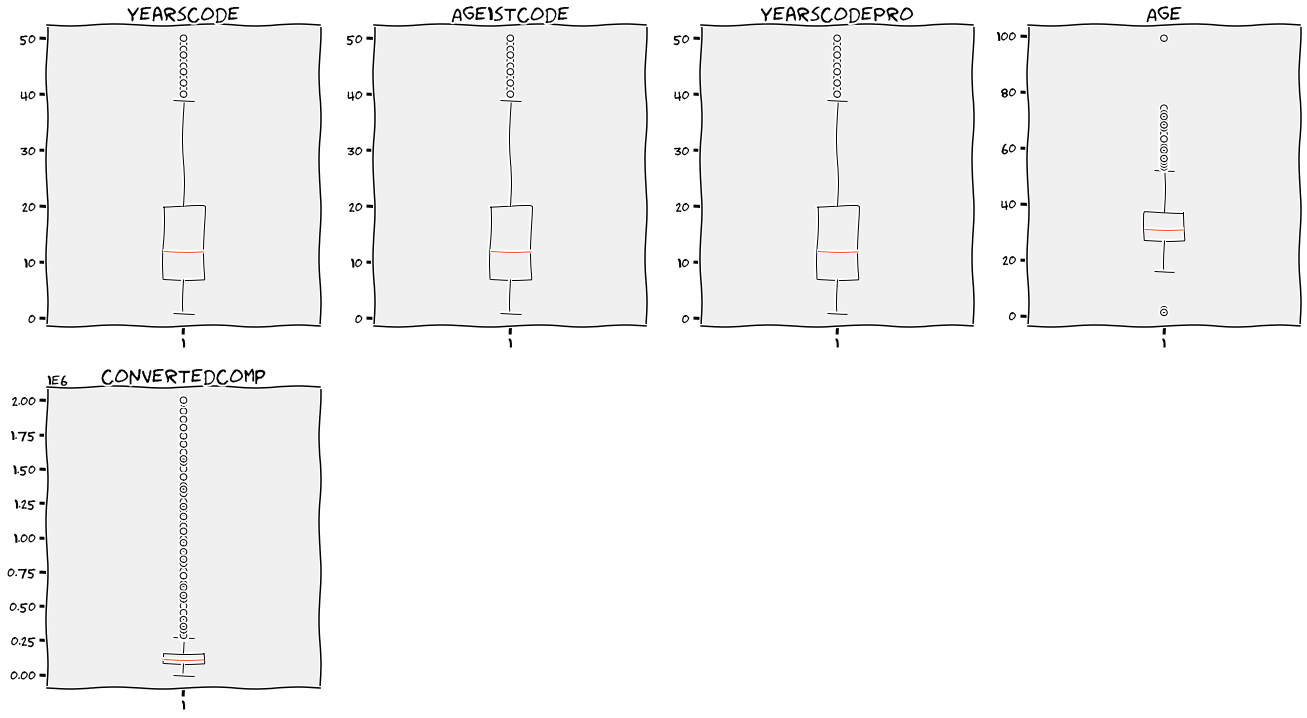

In [ ]:
# create a dictionary of columns 
col_dict = {
    'YearsCode':1,
    'Age1stCode':2,
    'YearsCodePro':3,
    'Age':4,
    'ConvertedComp':5
}

# detect outliers in each variable using box plots 
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(filt_data[variable], whis=1.5)
  plt.title(variable)

plt.show()

In [ ]:
# Calculate number of outliers and its percentage in each col using Tukey's method.
upper = {}
lower = {}
for col in col_dict.keys():
    q75, q25 = np.percentile(filt_data[col], [75 ,25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    num_of_outliers = len((np.where((filt_data[col] > max_val) | (filt_data[col] < min_val))[0]))
    perc_outlier = round(num_of_outliers*100/11276,2)
    
    up = len(np.where(filt_data[col] > max_val)[0])
    low = len(np.where(filt_data[col] < min_val)[0])
    
    if up > low:
        upper[col] = round((perc_outlier+1)/100,2)
    else:
        lower[col] = round((perc_outlier+1)/100,2)
    
    print(f'The number and percentage of Outliers in {col} : {num_of_outliers} and {perc_outlier}%')

The number and percentage of Outliers in YearsCode : 243 and 2.16%
The number and percentage of Outliers in Age1stCode : 243 and 2.16%
The number and percentage of Outliers in YearsCodePro : 243 and 2.16%
The number and percentage of Outliers in Age : 474 and 4.2%
The number and percentage of Outliers in ConvertedComp : 1305 and 11.57%


In [ ]:
# Removing Outliers in the variables using Winsorization technique.
def compare(data, column):
    global upper, lower
    plt.figure(figsize=(18,6))

    plt.subplot(1,2,1)
    original = data[column]
    plt.boxplot(original)
    plt.title(f'Original {column}', fontsize=15)
    
    if column in upper.keys():
        plt.subplot(1,2,2)
        winsorized = winsorize(data[column],(0,upper[column]))
        plt.boxplot(winsorized)
        plt.title(f'winsorized {column}', fontsize=15)
        plt.show()
    else:
        plt.subplot(1,2,2)
        winsorized = winsorize(data[column],(lower[column],0))
        plt.boxplot(winsorized)
        plt.title(f'winsorized {column}', fontsize=15)
        plt.show()

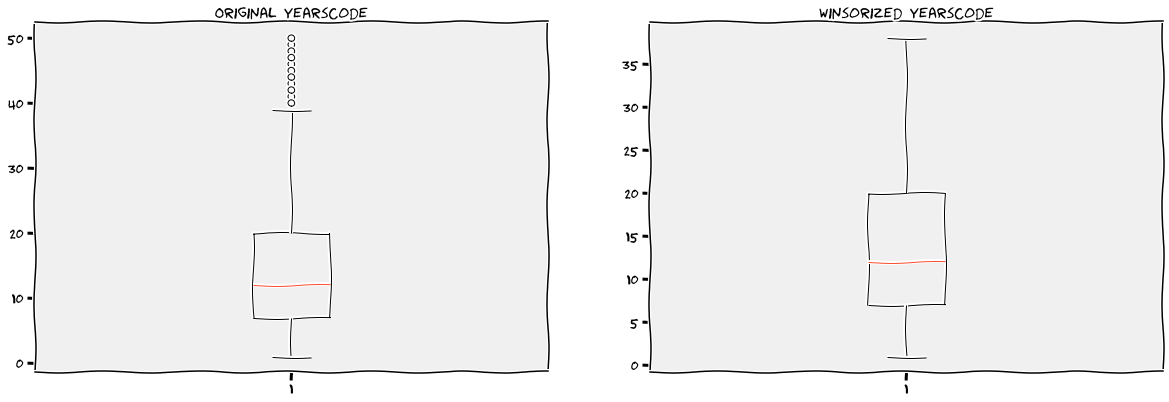

In [ ]:
compare(filt_data, 'YearsCode')

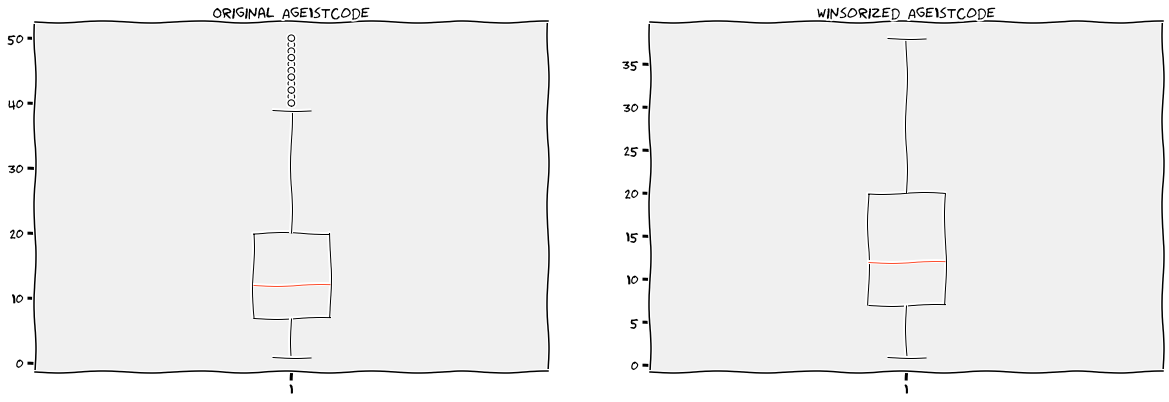

In [ ]:
compare(filt_data, 'Age1stCode')

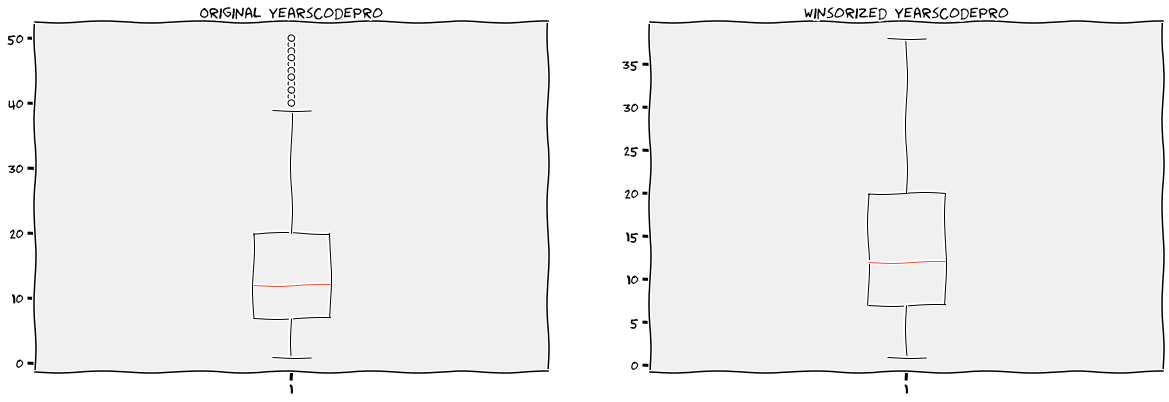

In [ ]:
compare(filt_data, 'YearsCodePro')

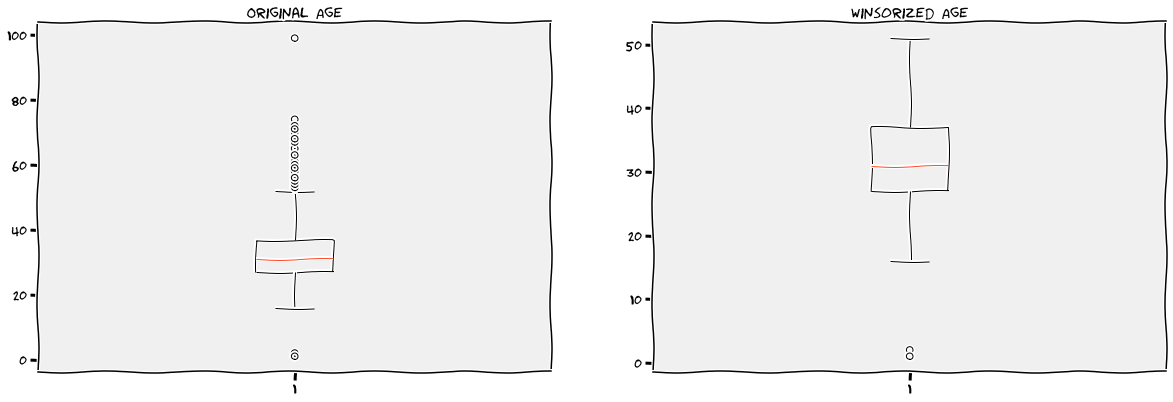

In [ ]:
compare(filt_data, 'Age')

we still see outliers in age feature

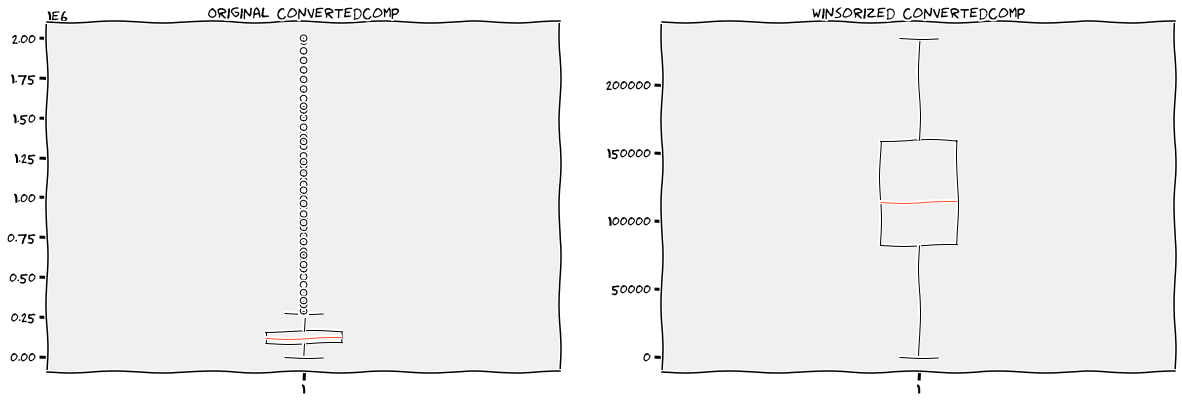

In [ ]:
compare(filt_data, 'ConvertedComp')

In [ ]:
for col in col_dict.keys():
    if col in upper.keys():
        filt_data[col] = winsorize(filt_data[col],(0,upper[col]))
    else:
        filt_data[col] = winsorize(filt_data[col],(lower[col], 0))

In [ ]:
filt_data.shape

(11276, 9)

In [ ]:
filt_data['Age'].unique()

array([22. , 28. , 34. , 21. , 35. , 42. , 45. , 47. , 30. , 37. , 33. ,
       51. , 26. , 38. , 32. , 36. , 24. , 25. , 27. , 39. , 44. , 23. ,
       40. , 43. , 31. , 50. , 41. , 29. , 49. , 48. , 46. , 19. , 20. ,
       26.5,  1. , 18. , 31.5, 17. ,  2. , 37.5, 16. ])

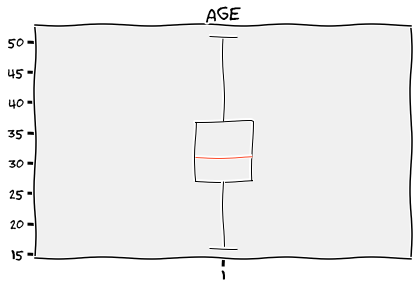

In [ ]:
# drop developer below 10 years old 
filt_data.drop(filt_data[ filt_data['Age'] < 10 ].index , inplace=True)
plt.boxplot(filt_data['Age'])
plt.title('Age')
plt.show()

### outlier removal 2

In [ ]:
filt_data.drop(filt_data[(filt_data['Age'] < 10) | (filt_data['Age'] > 80)].index , inplace=True)

### Feature Engineering

In [ ]:
filt_data.head()

,EdLevel,UndergradMajor,DevType,YearsCode,Age1stCode,YearsCodePro,ImpSyn,Age,ConvertedComp
3,Bachelor degree,Computer Science,Developer,3,3,3,below average,22.0,61000.0
12,Master degree,Computer Science,Data or business analyst,17,17,17,above average,28.0,90000.0
22,Bachelor degree,IT,Developer,3,3,3,average,22.0,69000.0
25,No degree,Computer Science,Designer,12,12,12,above average,34.0,114000.0
31,Associate degree,IT,Developer,3,3,3,above average,21.0,1100000.0


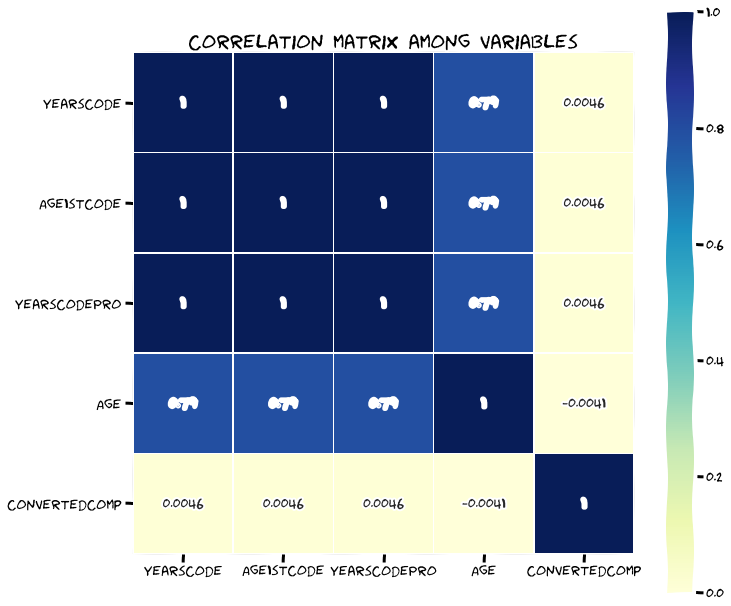

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(filt_data.corr(), square=True, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Correlation matrix among variables")
plt.show()

**OPPPPSSSS** Seems to be that we dont have variable that strongly correlate. Hmmm I will probably go back and try again. Well thats called experiment, if you failed just try again 